In [1]:
#Import ratinabox
import ratinabox
from ratinabox.Environment import Environment
from ratinabox.Agent import Agent
from ratinabox.Neurons import *

import matplotlib
%matplotlib inline

In [2]:
env = Environment(params={'scale':1.5, 'aspect':1})

(<Figure size 450x450 with 1 Axes>, <AxesSubplot: >)

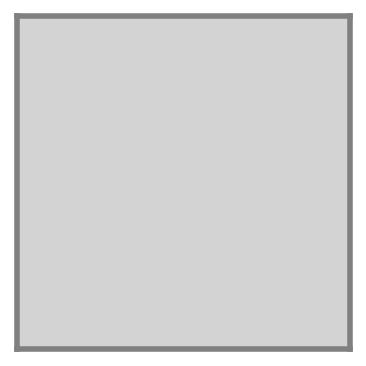

In [3]:
env.plot_environment()

In [4]:
agent = Agent(env, params={
    "dt": 0.01,
    "speed_coherence_time": 0.7,
    "speed_mean": 0.2,
    "rotational_velocity_coherence_time": 0.08,
    "rotational_velocity_std": 120 * (np.pi / 180),
    "thigmotaxis": 0.5,
})

In [5]:
place_cells = PlaceCells(agent, params={
    "n": 20,
    "name": "PlaceCells",
    "description": "gaussian",
    "widths": 0.20,
    "place_cell_centres": None,  # if given this will overwrite 'n',
    "wall_geometry": "line_of_sight",
    "min_fr": 0,
    "max_fr": 1,
    "name": "PlaceCells",
})

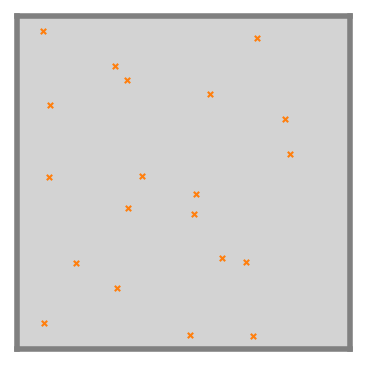

In [6]:
fig, ax = place_cells.plot_place_cell_locations()

In [7]:
from tqdm import tqdm #gives time bar

dt = 50e-3 # seconds
t_max = 10*60 # seconds

for i in tqdm(range(int(t_max/dt))):
    agent.update(dt=dt)
    place_cells.update()

100%|███████████████████████████████████████████████████████████████████████████| 12000/12000 [00:03<00:00, 3382.07it/s]


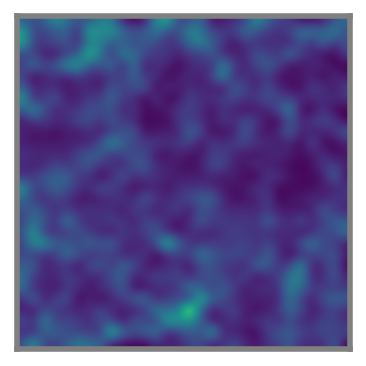

In [8]:
# plot history
fig, ax = agent.plot_position_heatmap()

In [9]:
anim = agent.animate_trajectory(speed_up=10)

In [10]:
from IPython import display
video = anim.to_html5_video()

In [11]:
html = display.HTML(video)
display.display(html)

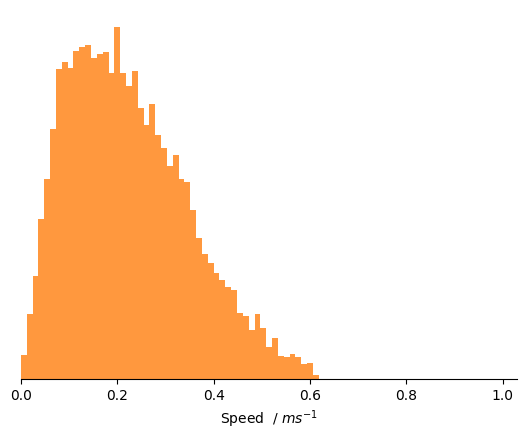

In [12]:
fig, ax = agent.plot_histogram_of_speeds()

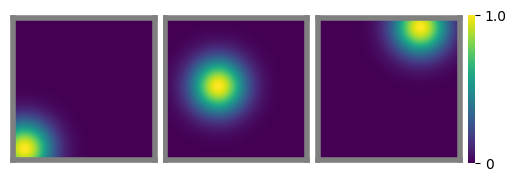

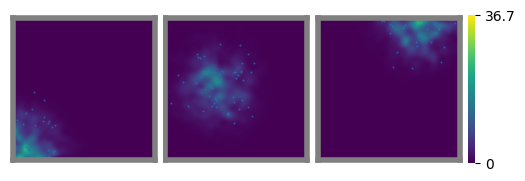

In [13]:
# 10 Plot rate maps. 
fig, ax = place_cells.plot_rate_map(chosen_neurons='3',method='groundtruth')
fig, ax = place_cells.plot_rate_map(chosen_neurons='3',method='history',spikes=True)

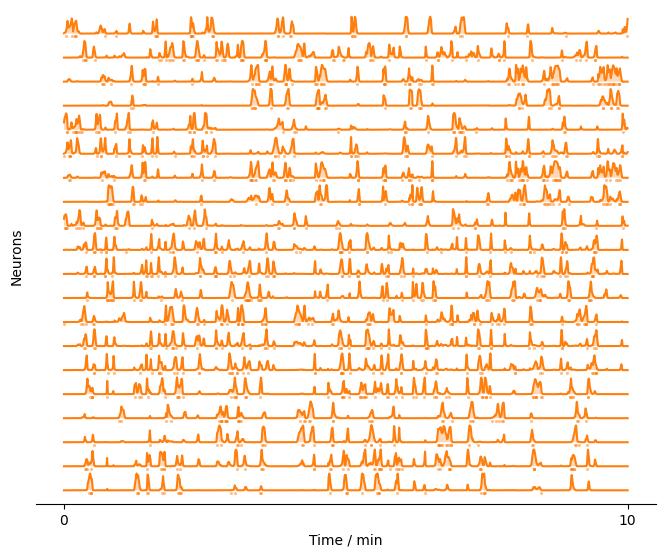

In [14]:
fig, ax = place_cells.plot_rate_timeseries()

(<Figure size 800x400 with 1 Axes>,
 <AxesSubplot: xlabel='Time / min', ylabel='Neurons'>)

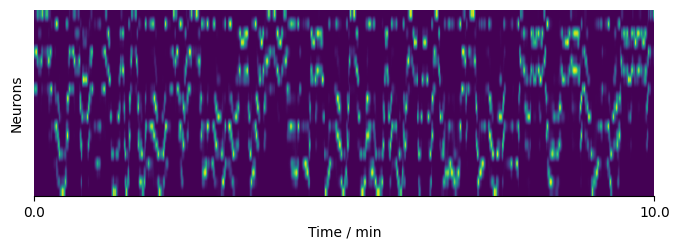

In [15]:
place_cells.plot_rate_timeseries(imshow=True)

In [16]:
print("Timestamps:", agent.history['t'][:10],"\n")
print("Positions:", agent.history['pos'][:10],"\n")
print("Firing rate timeseries:", place_cells.history['firingrate'][:10],"\n")
print("Spikes:", place_cells.history['spikes'][:10],"\n")

Timestamps: [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994] 

Positions: [[1.4629261525367578, 0.9968215079376523], [1.453654210919433, 0.9941977379327439], [1.4447822064890077, 0.9916717653085747], [1.435580465390165, 0.9894132611699529], [1.4292548915582381, 0.9885869630764522], [1.4247208452813838, 0.9885141866492402], [1.4192270958603357, 0.9881166709343456], [1.4106513399825718, 0.9877662064675594], [1.4042878466600621, 0.9891129450014661], [1.395787773321661, 0.9921979107279539]] 

Firing rate timeseries: [[1.2208057915572217e-14, 4.245044671255448e-09, 6.127882603738938e-08, 2.4146523404230267e-06, 1.6675251011895933e-10, 1.8073505685551355e-06, 0.0006106872359804358, 0.0010198503712547735, 2.086159514534084e-10, 2.2694034442027958e-05, 0.0015266787708108933, 0.4224897752898115, 3.999109639093419e-10, 4.74835886703619e-06, 0.009234293206779515, 0.43911288398485526, 1.5127951438197724e-11, 8.61152106930977e-07,